In [67]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [68]:
# Display MAX Rows and Columns
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 100)

In [69]:
# Read CSV file
df= pd.read_csv('loan.csv')

In [70]:
# Check first 5 rows
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [71]:
# Check Rows and Columns
df.shape

(39717, 111)

In [72]:
# Check percentage of null value
df.isnull().mean() * 100

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

# Start Cleaning Process
### **Drop Column more than 75% missing value**

In [73]:
# Remove Column more than 75% of NULL values
perc = 75.0
min_count =  int(((100-perc)/100)*df.shape[0] + 1)
df = df.dropna( axis=1,thresh=min_count)

In [74]:
# Check total NULL value Column wise
df.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12942
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

### **Drop Columns which do not contribute to analysis**

In [75]:
# Drop Column which is not needed in analysis
df.drop(['id', 'member_id', 'pymnt_plan', 'url', 'desc', 'title', 'zip_code', 'delinq_2yrs','inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens' ], axis = 1, inplace = True)

In [76]:
# Check total Column
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'earliest_cr_line'],
      dtype='object')

In [77]:
# Check rows and columns
df.shape

(39717, 19)

### Check how many missing values are in remaining columns

In [78]:
# Check sum of NA in column
df.isna().sum()

loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_title              2459
emp_length             1075
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
addr_state                0
dti                       0
earliest_cr_line          0
dtype: int64

### Fill missing value with "**Not Found**" text

In [79]:
# Add Not Found instead of NA in emp_title field
df.emp_title.fillna('Not Found', inplace = True)

In [80]:
# Add Not Found instead of NA in emp_length field
df.emp_length.fillna('Not Found', inplace = True)

In [81]:
# Check sum of NA in column
df.isna().sum()

loan_amnt              0
funded_amnt            0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_title              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
addr_state             0
dti                    0
earliest_cr_line       0
dtype: int64

In [82]:
# Check data type of all column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   funded_amnt          39717 non-null  int64  
 2   funded_amnt_inv      39717 non-null  float64
 3   term                 39717 non-null  object 
 4   int_rate             39717 non-null  object 
 5   installment          39717 non-null  float64
 6   grade                39717 non-null  object 
 7   sub_grade            39717 non-null  object 
 8   emp_title            39717 non-null  object 
 9   emp_length           39717 non-null  object 
 10  home_ownership       39717 non-null  object 
 11  annual_inc           39717 non-null  float64
 12  verification_status  39717 non-null  object 
 13  issue_d              39717 non-null  object 
 14  loan_status          39717 non-null  object 
 15  purpose              39717 non-null 

### Remove Percentage in interest value

In [83]:
# Remove percentage from int_rate and make columnn fload
df["int_rate"] = df["int_rate"].str.rstrip("%").astype("float")

### Split issue month and year

In [84]:
# Split issue_d and make new column loan_issue_month and loan_issue_year
df[['loan_issue_month', 'loan_issue_year']] = df['issue_d'].str.split('-', expand=True)

### Remove Months from term

In [85]:
# Remove months from term
df['term'] = df['term'].str.extract('(\d+)').astype(int)

In [86]:
# Check data type of all column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   funded_amnt          39717 non-null  int64  
 2   funded_amnt_inv      39717 non-null  float64
 3   term                 39717 non-null  int32  
 4   int_rate             39717 non-null  float64
 5   installment          39717 non-null  float64
 6   grade                39717 non-null  object 
 7   sub_grade            39717 non-null  object 
 8   emp_title            39717 non-null  object 
 9   emp_length           39717 non-null  object 
 10  home_ownership       39717 non-null  object 
 11  annual_inc           39717 non-null  float64
 12  verification_status  39717 non-null  object 
 13  issue_d              39717 non-null  object 
 14  loan_status          39717 non-null  object 
 15  purpose              39717 non-null 

### Change loan issue year data type

In [87]:
# Change loan_issue_year datatype object to int
df["loan_issue_year"] = df["loan_issue_year"].astype("int64")

In [88]:
# Check data type of all column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   funded_amnt          39717 non-null  int64  
 2   funded_amnt_inv      39717 non-null  float64
 3   term                 39717 non-null  int32  
 4   int_rate             39717 non-null  float64
 5   installment          39717 non-null  float64
 6   grade                39717 non-null  object 
 7   sub_grade            39717 non-null  object 
 8   emp_title            39717 non-null  object 
 9   emp_length           39717 non-null  object 
 10  home_ownership       39717 non-null  object 
 11  annual_inc           39717 non-null  float64
 12  verification_status  39717 non-null  object 
 13  issue_d              39717 non-null  object 
 14  loan_status          39717 non-null  object 
 15  purpose              39717 non-null 

# Create Groups and clean outliers

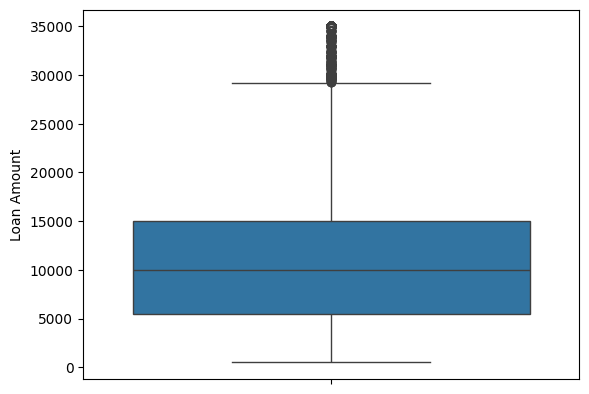

In [89]:
sns.boxplot( y=df["loan_amnt"] )
plt.ylabel('Loan Amount')
plt.show()

In [90]:
df['loan_amnt_groups'] = pd.cut(df['loan_amnt'], bins=7, precision=0, labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])

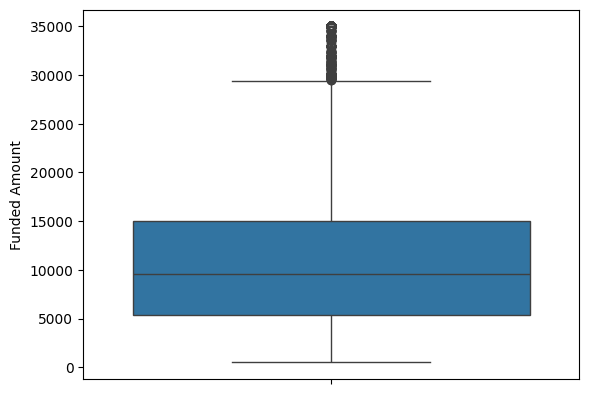

In [91]:
sns.boxplot( y=df["funded_amnt"] )
plt.ylabel('Funded Amount')
plt.show()

In [92]:
df['funded_amnt_groups'] = pd.cut(df['funded_amnt'], bins=7, precision=0, labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])

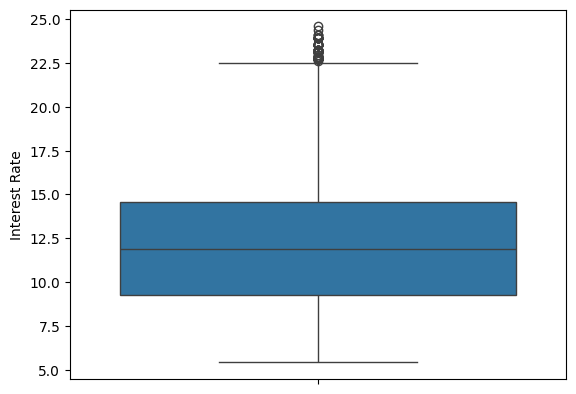

In [93]:
sns.boxplot( y=df["int_rate"] )
plt.ylabel('Count')
plt.ylabel('Interest Rate')
plt.show()

In [94]:
df['interest_rate_groups'] = pd.cut(df['int_rate'], bins=4, precision=0, labels=['5-10','10-15','15-20','20-25'])

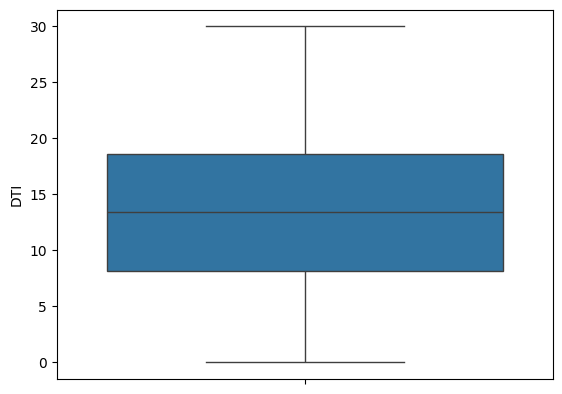

In [95]:
sns.boxplot( y=df["dti"] )
plt.ylabel('Count')
plt.ylabel('DTI')
plt.show()

In [96]:
df['dti_groups'] = pd.cut(df['dti'], bins=5, precision=0, labels=['0-6','6-12','12-18','18-24','24-30'])

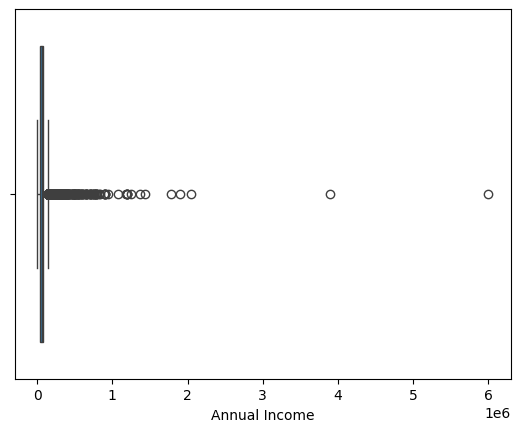

In [97]:
sns.boxplot( x=df["annual_inc"] )
plt.xlabel('Annual Income')
plt.show()

In [98]:
df = df[df.annual_inc <= df['annual_inc'].quantile(0.95)]

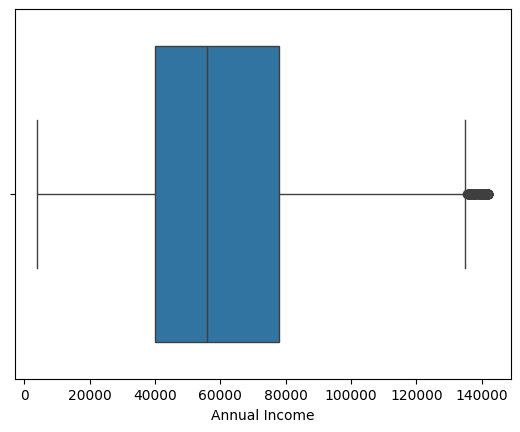

In [99]:
sns.boxplot( x=df["annual_inc"] )
plt.xlabel('Annual Income')
plt.show()

In [100]:
df['annual_inc_group'] = pd.cut(df['annual_inc'], bins=6, precision=0, labels=['0-20k','20k-40k', '40k-60k', '60k-80k', '80k-100k', '100k-120k'])

# **Data Visualisation**

# Univariate Analysis



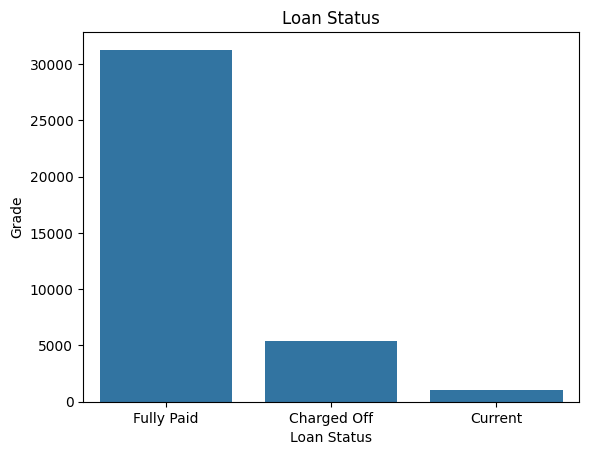

In [101]:
sns.countplot(x = 'loan_status', data = df)
plt.xlabel('Loan Status')
plt.ylabel('Grade')
plt.title('Loan Status')
plt.show()

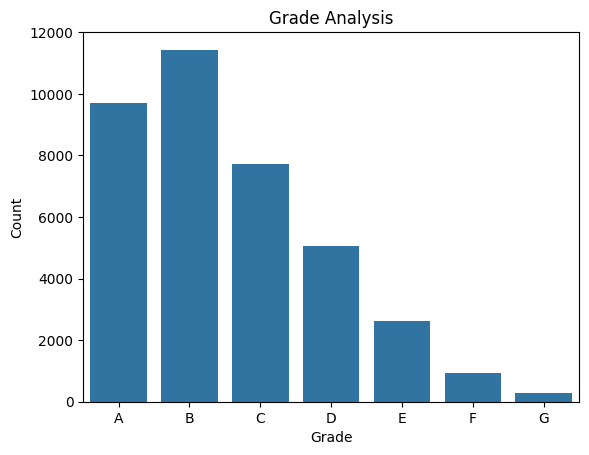

In [102]:
sns.countplot(x='grade', data=df, order=['A','B','C','D','E','F','G'])
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Grade Analysis')
plt.show()

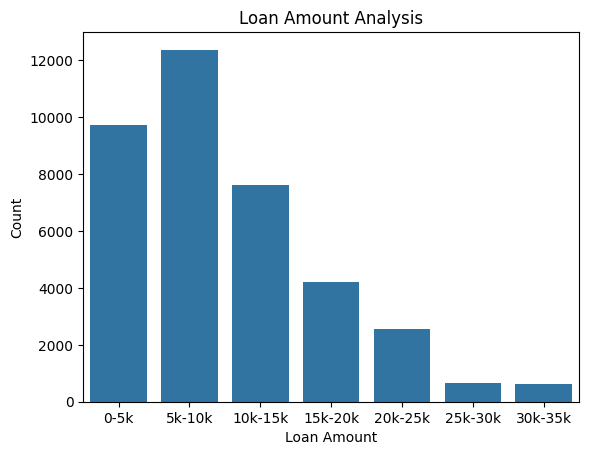

In [103]:
sns.countplot(x='loan_amnt_groups', data=df)
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Loan Amount Analysis')
plt.show()

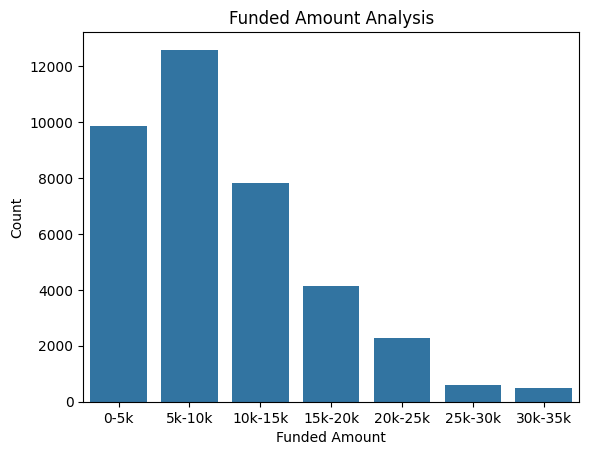

In [104]:
sns.countplot(x='funded_amnt_groups', data=df)
plt.xlabel('Funded Amount')
plt.ylabel('Count')
plt.title('Funded Amount Analysis')
plt.show()

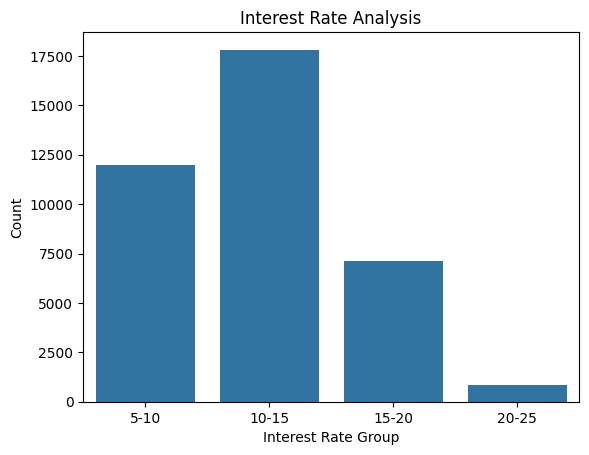

In [105]:
sns.countplot(x='interest_rate_groups', data=df)
plt.xlabel('Interest Rate Group')
plt.ylabel('Count')
plt.title('Interest Rate Analysis')
plt.show()

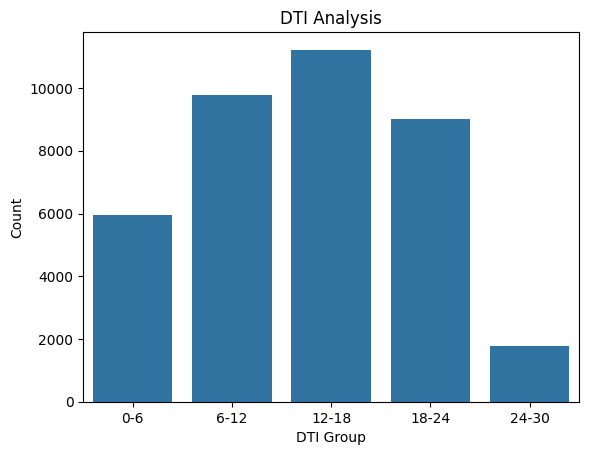

In [106]:
sns.countplot(x='dti_groups', data=df)
plt.xlabel('DTI Group')
plt.ylabel('Count')
plt.title('DTI Analysis')
plt.show()

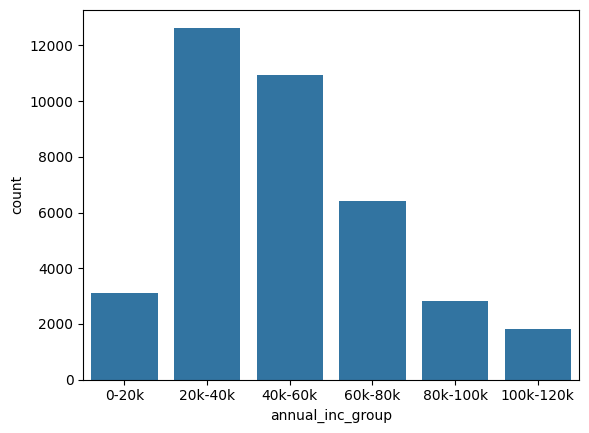

In [107]:
sns.countplot(x='annual_inc_group', data=df)
plt.show()

### Loan issue Month wise charged off


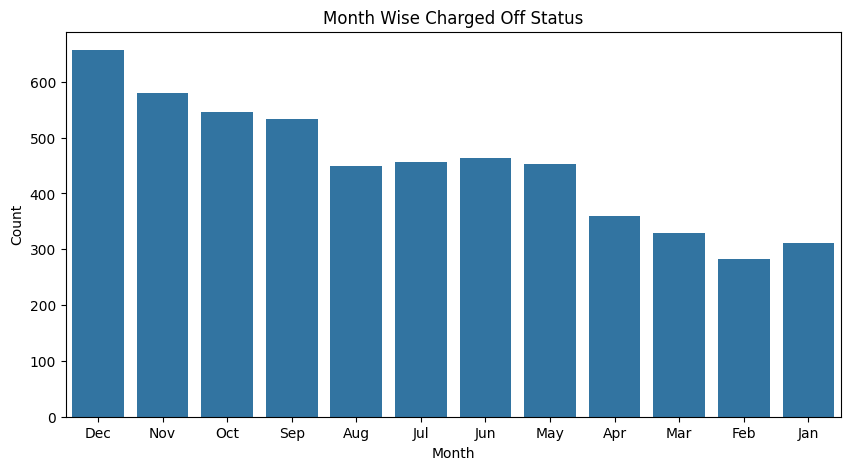

In [108]:
plt.figure(figsize=(10,5))
sns.countplot(x='loan_issue_month', data=df[df['loan_status']=='Charged Off'])
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Month Wise Charged Off Status')
plt.show()


### Loan issue Year wise charged off

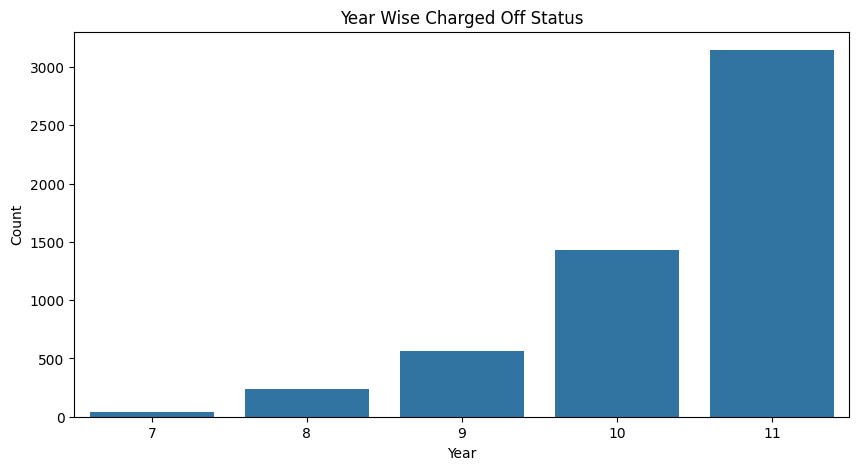

In [109]:
plt.figure(figsize=(10,5))
sns.countplot(x='loan_issue_year', data=df[df['loan_status']=='Charged Off'])
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Year Wise Charged Off Status')
plt.show()

*   Above Monthly chart shows December have higher charged off and February is Lower Charged Off.
*   Above yearly chart shows 2011 have a highest chrged off and 2007 is the lowest charged off

### Grade wise charged off

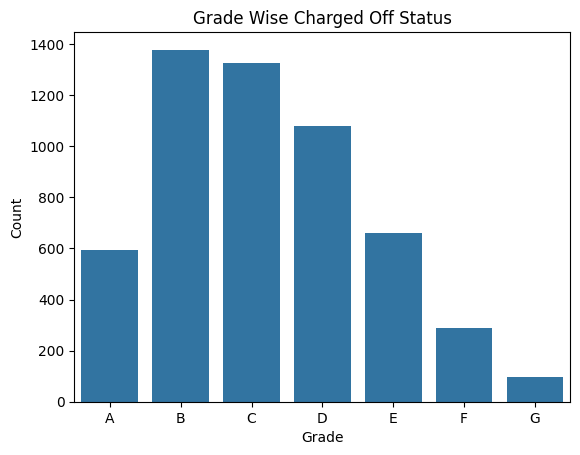

In [110]:
sns.countplot(x = 'grade', data = df[df.loan_status == 'Charged Off'], order=['A','B','C','D','E','F','G'])
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Grade Wise Charged Off Status')
plt.show()

In [111]:
df.sub_grade.unique()

array(['B2', 'C4', 'C5', 'C1', 'B5', 'A4', 'E1', 'F2', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F4', 'F1', 'E5', 'G4', 'E2', 'G3', 'G2', 'G1',
       'F5', 'G5'], dtype=object)

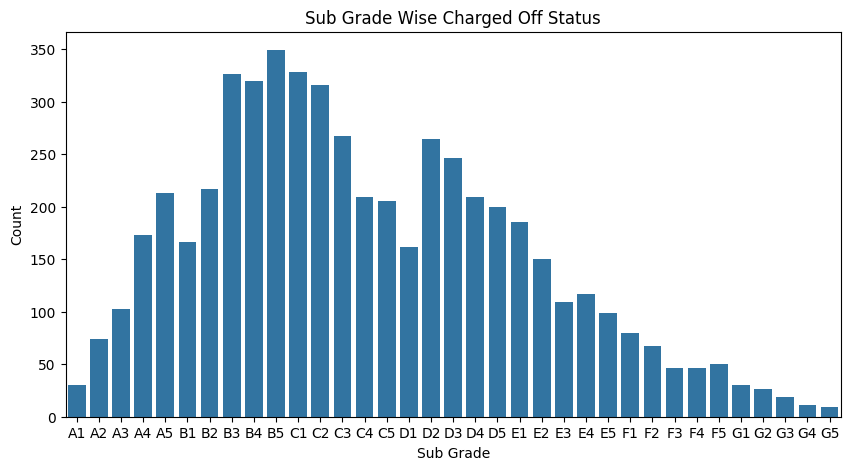

In [112]:
fig, ax = plt.subplots(figsize = (10,5))
sns.countplot(x = 'sub_grade', data = df[df.loan_status == 'Charged Off'],
              order=['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
                     'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5',
                     'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
                     'G1', 'G2', 'G3', 'G4', 'G5'])
plt.xlabel('Sub Grade')
plt.ylabel('Count')
plt.title('Sub Grade Wise Charged Off Status')
plt.show()

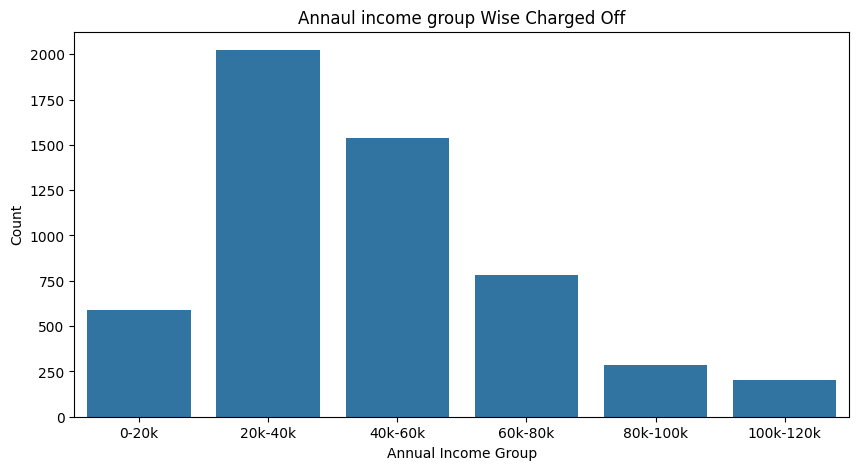

In [113]:
fig, ax = plt.subplots(figsize = (10,5))
sns.countplot(x = 'annual_inc_group', data = df[df.loan_status == 'Charged Off'])
plt.xlabel('Annual Income Group')
plt.ylabel('Count')
plt.title('Annaul income group Wise Charged Off')
plt.show()

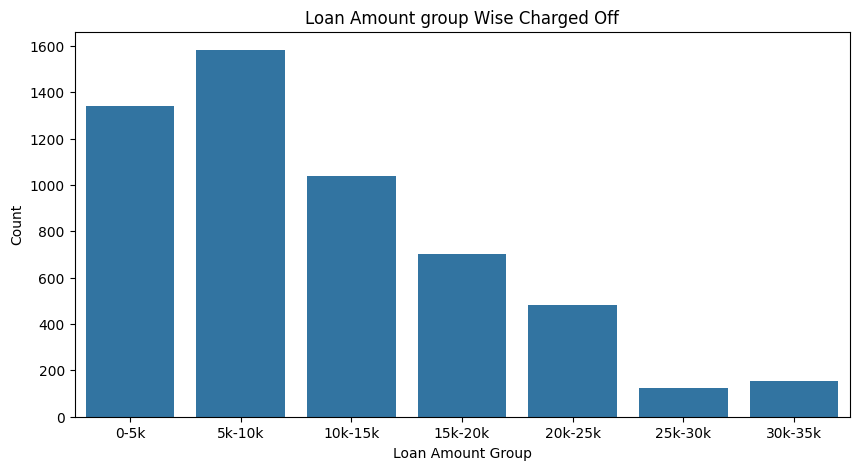

In [114]:
fig, ax = plt.subplots(figsize = (10,5))
sns.countplot(x = 'loan_amnt_groups', data = df[df.loan_status == 'Charged Off'])
plt.xlabel('Loan Amount Group')
plt.ylabel('Count')
plt.title('Loan Amount group Wise Charged Off')
plt.show()

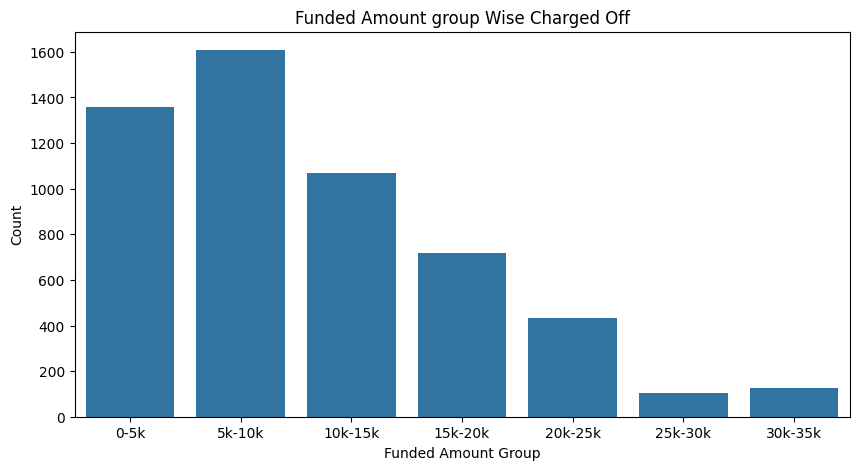

In [115]:
fig, ax = plt.subplots(figsize = (10,5))
sns.countplot(x = 'funded_amnt_groups', data = df[df.loan_status == 'Charged Off'])
plt.xlabel('Funded Amount Group')
plt.ylabel('Count')
plt.title('Funded Amount group Wise Charged Off')
plt.show()

### Home Ownership wise charged off

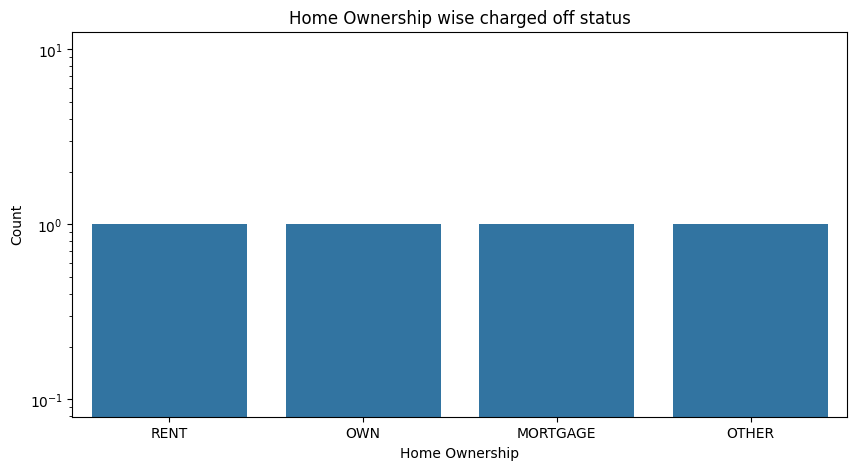

In [116]:
fig, ax = plt.subplots(figsize = (10,5))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=df[df['loan_status']=="Charged Off"])
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Home Ownership wise charged off status')
plt.show()

### Purpose Wise Charged Off

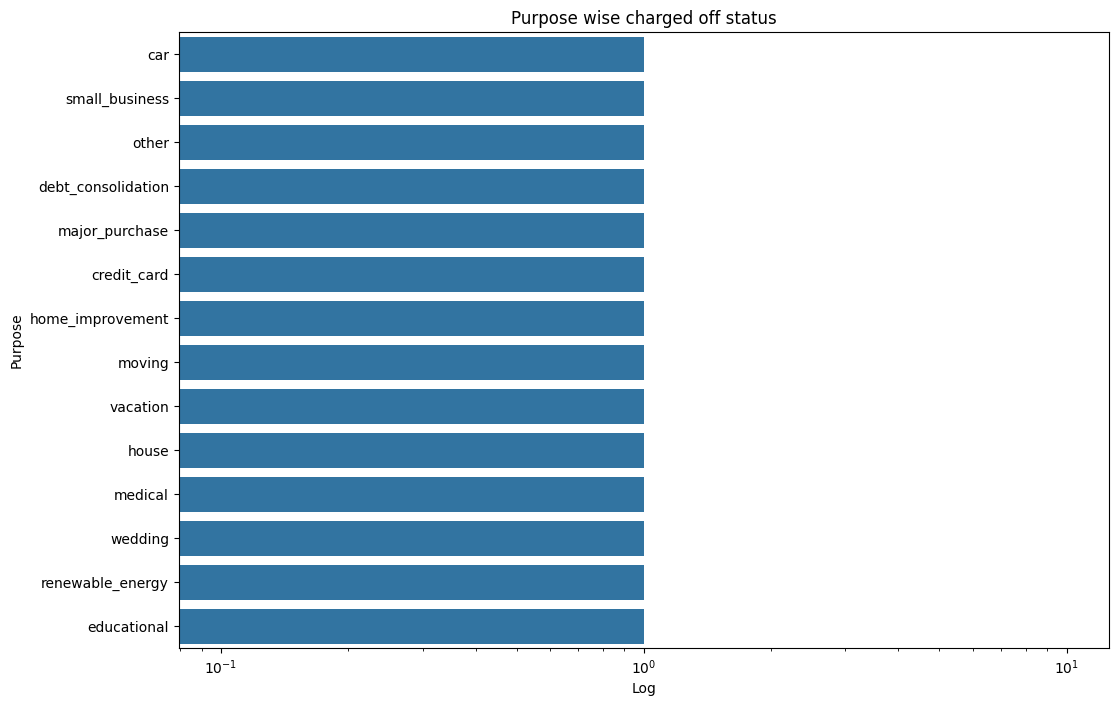

In [117]:
fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=df[df.loan_status == 'Charged Off'])
plt.xlabel('Log')
plt.ylabel('Purpose')
plt.title('Purpose wise charged off status')
plt.show()

### Interest Rate wise charged off

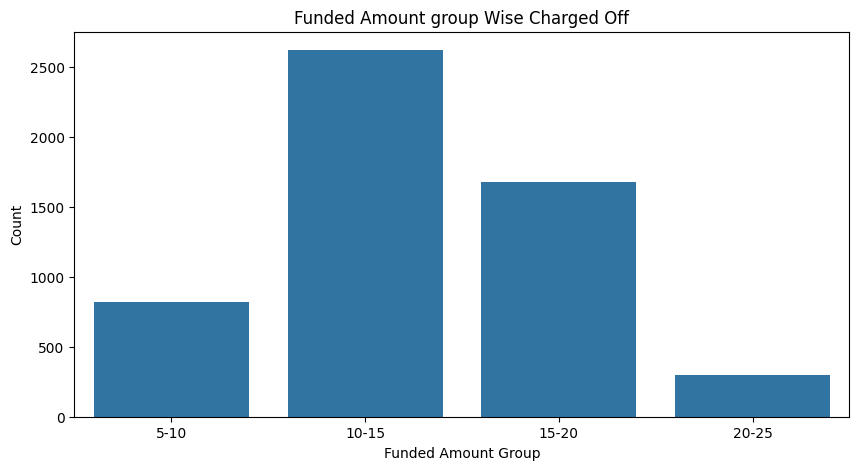

In [118]:
fig, ax = plt.subplots(figsize = (10,5))
sns.countplot(x = 'interest_rate_groups', data = df[df.loan_status == 'Charged Off'])
plt.xlabel('Funded Amount Group')
plt.ylabel('Count')
plt.title('Funded Amount group Wise Charged Off')
plt.show()

### Term Wise Charged Off

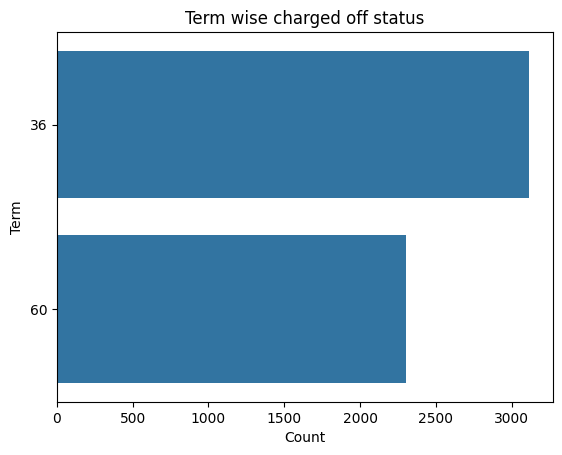

In [119]:
sns.countplot(y='term', data=df[df['loan_status']=='Charged Off'])
plt.xlabel('Count')
plt.ylabel('Term')
plt.title('Term wise charged off status')
plt.show()

### Address State wise charged off

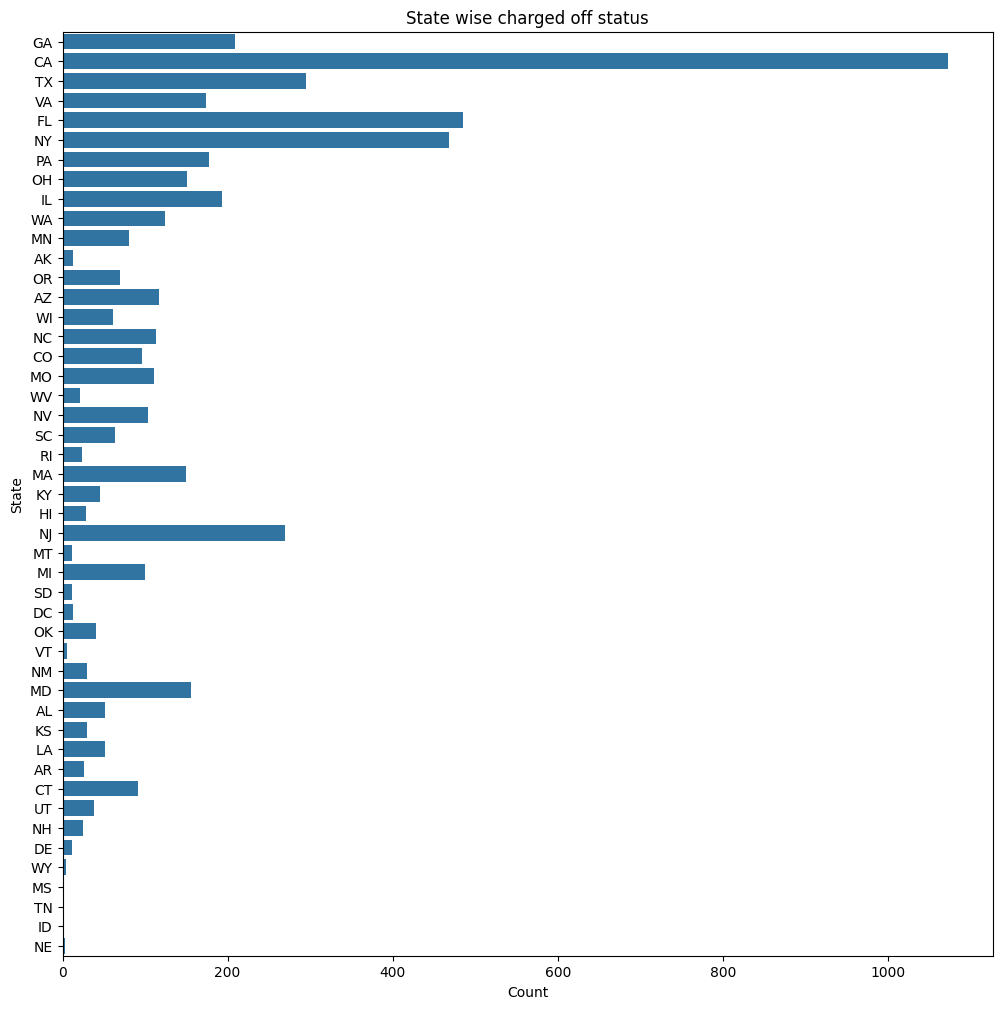

In [120]:
fig, ax = plt.subplots(figsize = (12,12))
sns.countplot(y='addr_state', data=df[df['loan_status']=='Charged Off'])
plt.xlabel('Count')
plt.ylabel('State')
plt.title('State wise charged off status')
plt.show()

### Verification status wise charged off

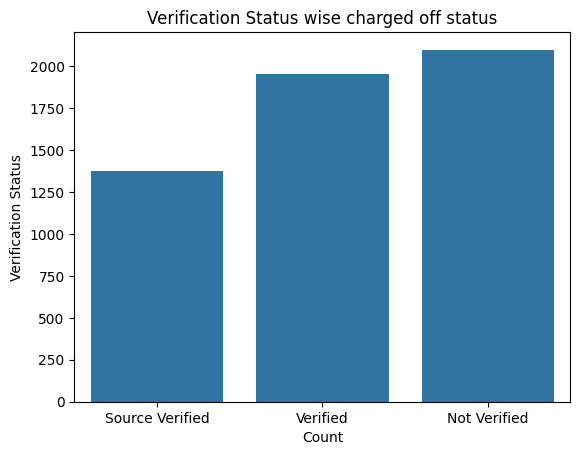

In [121]:
sns.countplot(x='verification_status', data=df[df['loan_status']=='Charged Off'])
plt.xlabel('Count')
plt.ylabel('Verification Status')
plt.title('Verification Status wise charged off status')
plt.show()

### Annual income and purpose wise charged off

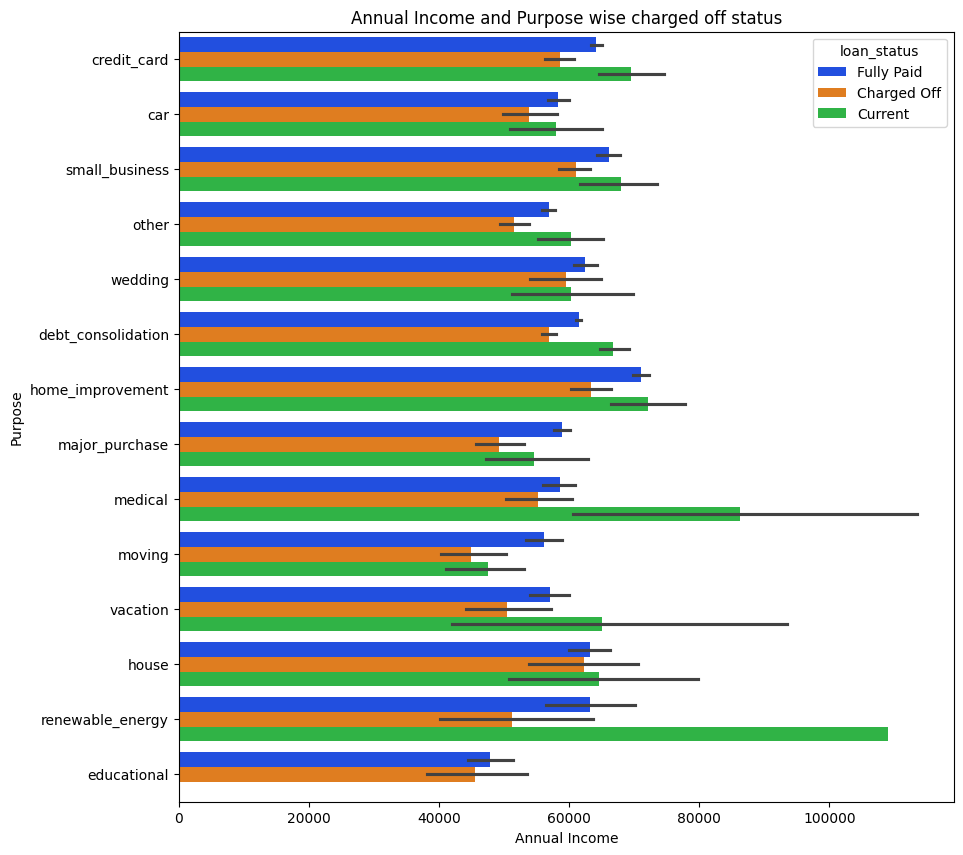

In [122]:
plt.figure(figsize=(10,10))
sns.barplot(data=df,x='annual_inc', y='purpose', hue ='loan_status',palette="bright")
plt.xlabel('Annual Income')
plt.ylabel('Purpose')
plt.title('Annual Income and Purpose wise charged off status')
plt.show()
plt.show()

### Home Ownership and annual income wise charged off

In [123]:
#replacing 'NONE' with 'OTHERS'
df['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

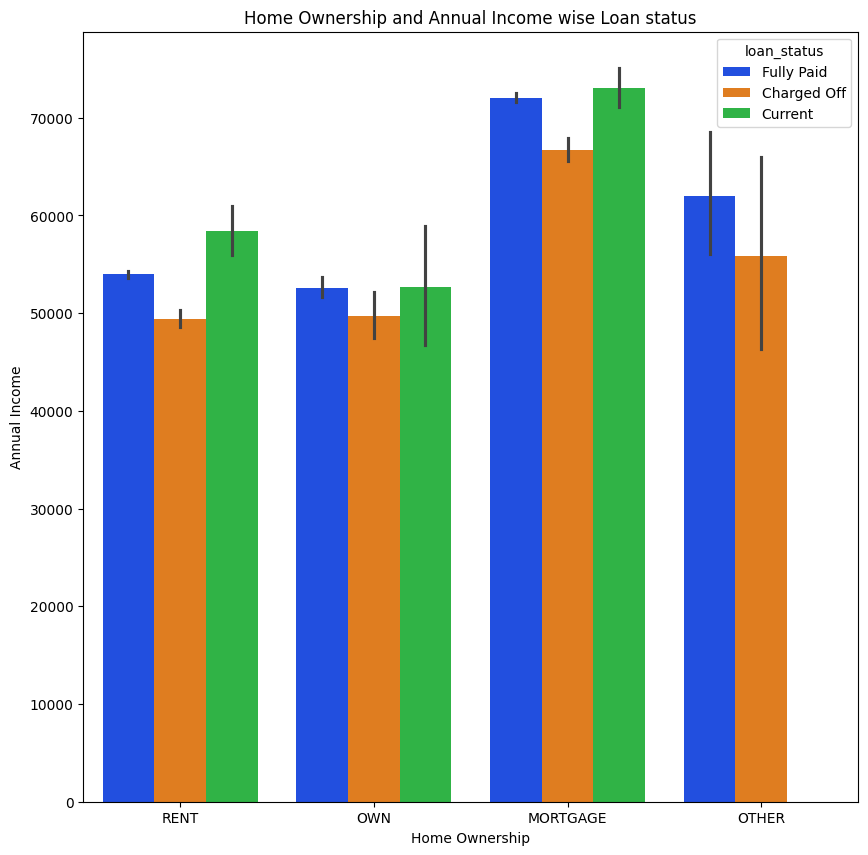

In [124]:
plt.figure(figsize=(10,10))
sns.barplot(data =df,x='home_ownership', y='annual_inc', hue ='loan_status',palette="bright")
plt.xlabel('Home Ownership')
plt.ylabel('Annual Income')
plt.title('Home Ownership and Annual Income wise Loan status')
plt.show()

### Loan Amount and Purpose wise charged off

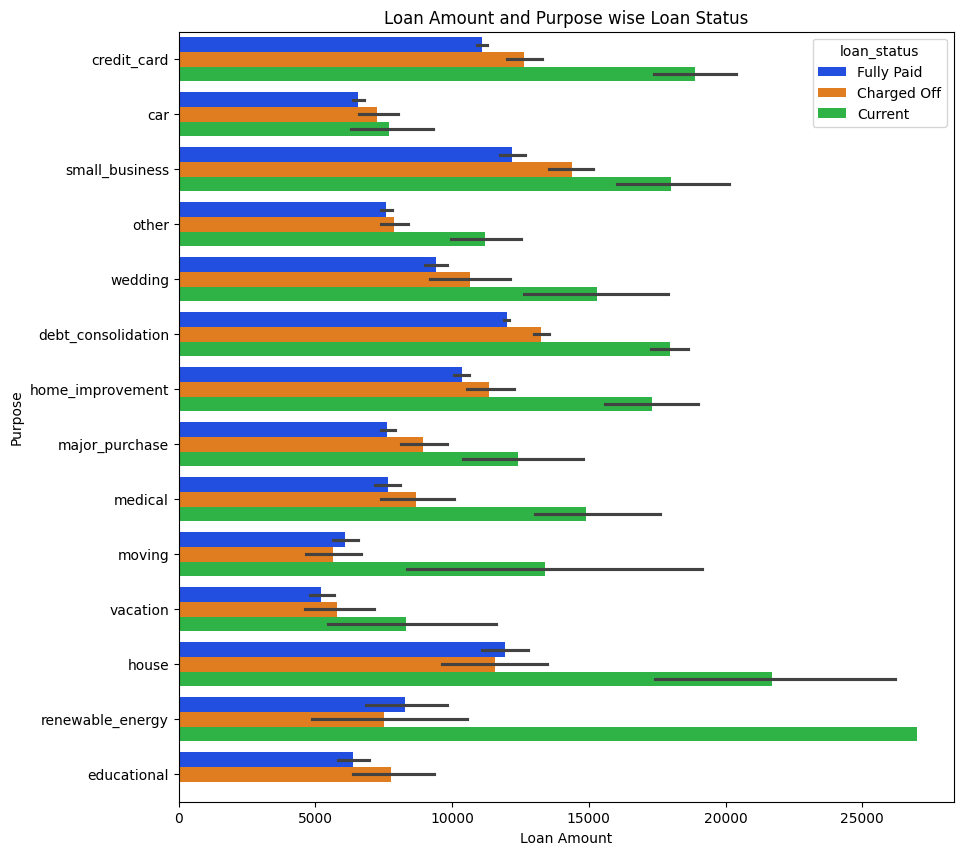

In [125]:
plt.figure(figsize=(10,10))
sns.barplot(data =df,x='loan_amnt', y='purpose', hue ='loan_status',palette="bright")
plt.xlabel('Loan Amount')
plt.ylabel('Purpose')
plt.title('Loan Amount and Purpose wise Loan Status')
plt.show()

### Loan Amount and Employee Length wise charged off

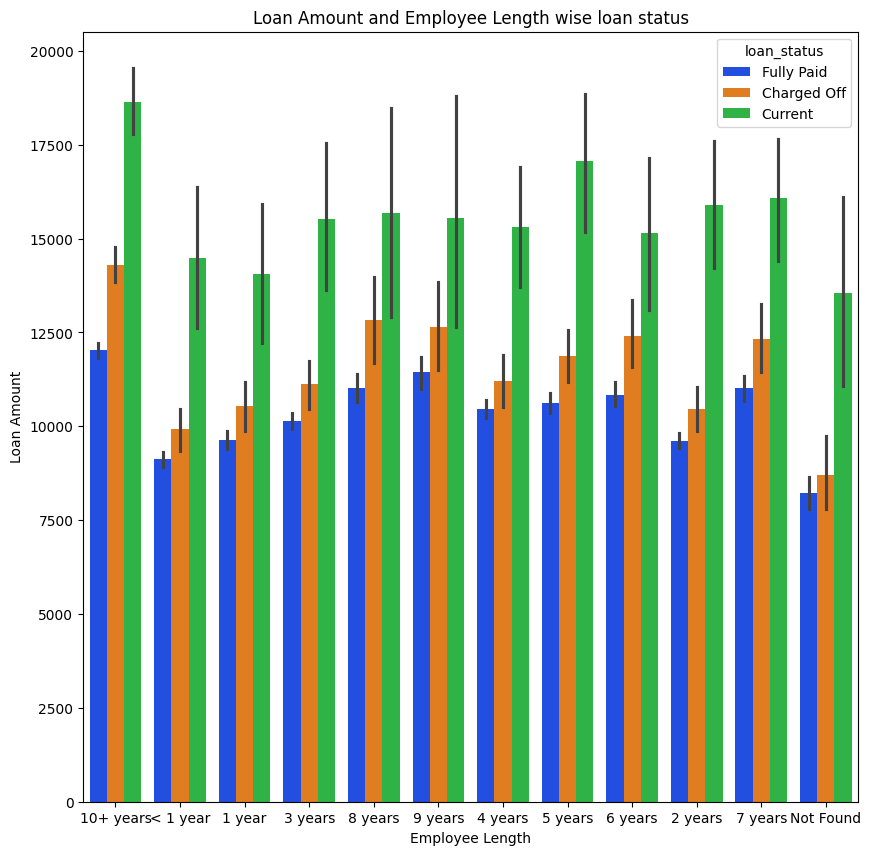

In [126]:
plt.figure(figsize=(10,10))
sns.barplot(data =df,y='loan_amnt', x='emp_length', hue ='loan_status',palette="bright")
plt.xlabel('Employee Length')
plt.ylabel('Loan Amount')
plt.title('Loan Amount and Employee Length wise loan status')
plt.show()

### Loan amount and verification status wise charged off

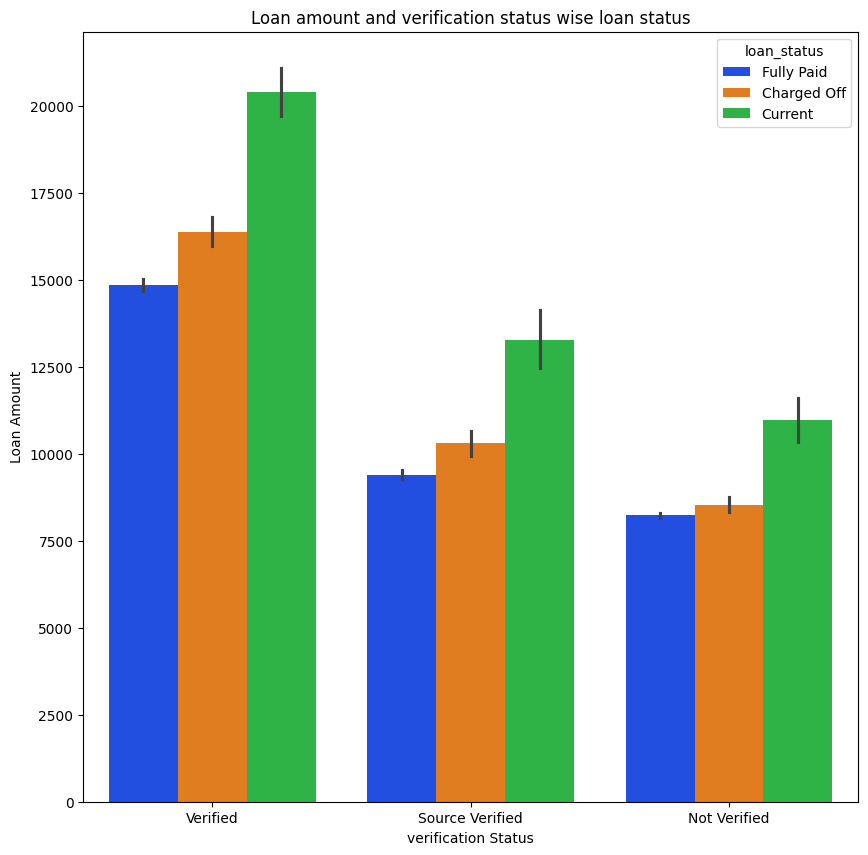

In [127]:
plt.figure(figsize=(10,10))
sns.barplot(data =df,y='loan_amnt', x='verification_status', hue ='loan_status',palette="bright")
plt.xlabel('verification Status')
plt.ylabel('Loan Amount')
plt.title('Loan amount and verification status wise loan status')
plt.show()

In [128]:
df['defaulted'] = df.loan_status.apply(lambda x : True if x == "Charged Off" else False)

In [129]:
def default_percentage(df,col):
    return df[df.defaulted == True][col].value_counts()/df[col].value_counts()*100

In [130]:
col1= 'defaulted'
col2='emp_title'
bins = df.emp_title.value_counts().head(20).index
newdf = pd.DataFrame()
newdf[col1] = df[df[col2].isin(bins)][col1]
newdf[col2] = df[df[col2].isin(bins)][col2]
default_percentage(newdf,col2).sort_values(ascending = False).head()

emp_title
Walmart      31.818182
UPS          23.076923
AT&T         20.689655
U.S. Army    20.512821
Not Found    20.308370
Name: count, dtype: float64

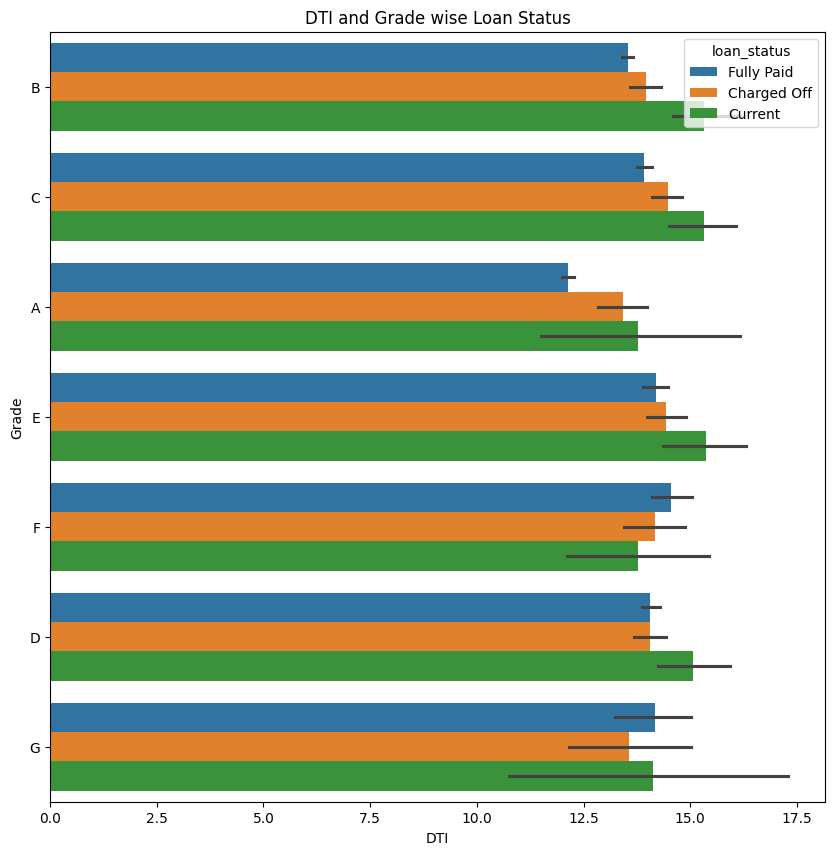

In [131]:
plt.figure(figsize=(10,10))
sns.barplot(data=df,x='dti',y='grade',hue='loan_status')
plt.xlabel('DTI')
plt.ylabel('Grade')
plt.title('DTI and Grade wise Loan Status',fontsize=12)
plt.show()

In [132]:
# Heatmap of correlation between variables
plt.figure(figsize=(10,10))
ax = sns.heatmap(df.corr(), annot=True, cmap="PiYG")
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
plt.show()

ValueError: could not convert string to float: 'B'

<Figure size 1000x1000 with 0 Axes>

# Univariate

- Fully loan paid average is more than defaulter
- There are A and B grade where most of the loans are charged off and least loans are charged off in Grade F and G.
- Most of the employee want loan between 0-10k where 5-10k are most highest number of loan asking group
- Mostly loans are funded between 0-10k where 5-10k are most highest number of loan funded group
- Most of the loans are provided between 5-15% interest rate
- 6-12 is highest group of DTI where loan is provided where 24-30 group is lowest area where loan is provided
- Most of the loan provided between 40k to 60k annual income group




# Bivariate

- The loan issued in December is the highest defaulter and loan issue in February is the lower defaulter.
- The loan issued in 2011 is the highest defaulter and loan issued in 2007 is the lowest defaulter.
- Loan provided in Grade B is highest defaulter where loan provided in Grade G is lowest defaulter.
- Sub Grade Group B3 to C3 is highest sub group where loan is defaulted
- The loan provided between 0-20k is the highest defaulter
- Laon asking 0-10k group have highest number of defaulter
- Loan funded in group 0-10k have highest number of defaulter
- Rent and Mortgage is highest number of defaulter
- Taken loan for Debt Consolidation purpose is highest number of defaulter where taken loan for renewable energy has least number of defaulter.
- Interest rate between 10-15% have highest number of defaulter where highest interest rate loan have less defaulters.
- 36 months loan have more defaulter than 60 months.
- California state has highest number of defaulter. Interestingly major cities like Florida, Texas and New York have highest defaulters.
- Not verified have highest number of loan defaulters but verified have also large defaulters.

# Multivariant

- Nearest 200k annual income and purpose is Home improvement and credit card is highest number of defaulters.
- Nearest 200k annual income and Morgage is highest number of defaulters.
- Loan amount is 6k-8k and purpose is Major Purchse have highest number of defaulters.
- Loan amount is 6k-8k and employee length 7 year have number of defaulters.
- Between dti 10-15 and grade A to D have highest defaulters.
- Wallmart employee is highest number of defaulter